In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
from matplotlib.ticker import FuncFormatter
def roys_fontset(plt):
    print('load Roys fontest')
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    
    # Check if 'Arial' is available, otherwise use a different font
    if 'Arial' not in [f.name for f in font_manager.fontManager.ttflist]:
        plt.rcParams['font.sans-serif'] = "DejaVu Sans"  # Use 'DejaVu Sans' as an alternative
        plt.rcParams['font.family'] = "sans-serif"
    else:
        plt.rcParams['font.sans-serif'] = "Arial"
        plt.rcParams['font.family'] = "sans-serif"
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42

    tick_major = 6
    tick_minor = 4
    plt.rcParams["xtick.major.size"] = tick_major
    plt.rcParams["xtick.minor.size"] = tick_minor
    plt.rcParams["ytick.major.size"] = tick_major
    plt.rcParams["ytick.minor.size"] = tick_minor

    font_small = 12
    font_medium = 13
    font_large = 14
    plt.rc('font', size=font_small)          # controls default text sizes
    plt.rc('axes', titlesize=font_medium)    # fontsize of the axes title
    plt.rc('axes', labelsize=font_medium)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=font_small)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=font_small)    # fontsize of the tick labels
    plt.rc('legend', fontsize=font_small)    # legend fontsize
    plt.rc('figure', titlesize=font_large)   # fontsize of the figure title
roys_fontset(plt)


load Roys fontest


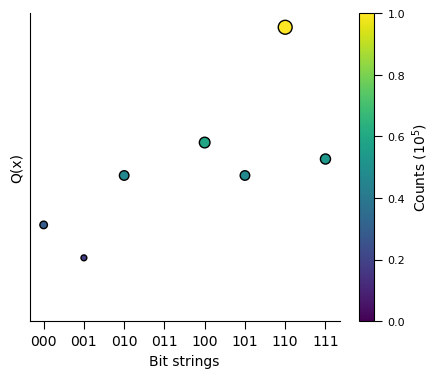

In [36]:
# Define the combinations and Q(x) values


# Define the combinations and Q(x) values
#combinations = ['000', '001', '010', '011', '100', '101', '110', '111']
Q_values = [0, -2, 3, -5, 5, 3, 12, 4]

# Scale Q(x) values to counts (0 to 100,000)
min_Q = min(Q_values)
max_Q = max(Q_values)
scaled_counts = [(q - min_Q) / (max_Q - min_Q) * 100000 for q in Q_values]

# Create the scatter plot
plt.figure(figsize=(5, 4))
scatter = plt.scatter(
    combinations, 
    scaled_counts, 
    c=scaled_counts, 
    cmap='viridis', 
    s=np.array(scaled_counts) / 1000,  # Size of dots proportional to counts
    edgecolor='black'
)
plt.xlabel('Bit strings', fontsize=10)
plt.ylabel('Q(x)', fontsize=10)
#plt.title('QUBO Function Values for All Combinations (Scatter Plot)', fontsize=14)

# Remove grid
plt.grid(False)

# Remove y-axis tick marks
plt.yticks([])

# Remove x-axis tick marks but keep labels
plt.xticks(ticks=range(len(combinations)), labels=combinations, fontsize=10)

# Format y-axis to scientific notation
def times_10_5(x, pos):
    return f'{x / 1e5:.1f}'

# Add a colorbar for aesthetic appeal
cbar = plt.colorbar(scatter)
cbar.set_label('Counts ($ 10^5$)', fontsize=10)
cbar.formatter = FuncFormatter(times_10_5)
cbar.update_ticks()
cbar.ax.tick_params(labelsize=8)
# Show the plot
plt.show()

In [1]:
!pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.4 MB/s eta 0:00:00a 0:00:01


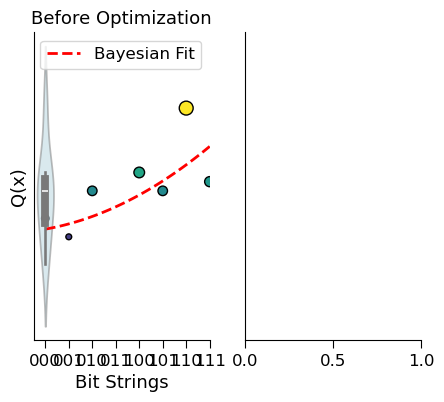

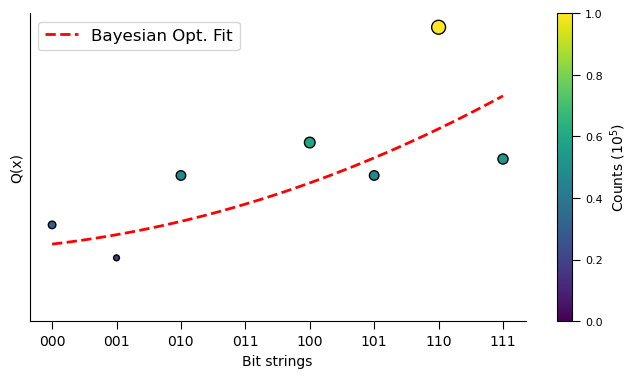

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from matplotlib.ticker import FuncFormatter

# Define the combinations and Q(x) values
combinations = ['000', '001', '010', '011', '100', '101', '110', '111']
Q_values = np.array([0, -2, 3, -5, 5, 3, 12, 4])

# Scale Q(x) values to counts (0 to 100,000)
min_Q = np.min(Q_values)
max_Q = np.max(Q_values)
scaled_counts = (Q_values - min_Q) / (max_Q - min_Q) * 100000

# Define x-axis positions for combinations
x_positions = np.arange(len(combinations))

# Define a function to model the Bayesian optimization prediction
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the quadratic model to the data
params, _ = curve_fit(quadratic_model, x_positions, scaled_counts)

# Function to apply Bayesian-inspired transformation
def bayesian_rescale(Q_values, optimized_index, alpha=1.0):
    distances = np.abs(np.arange(len(Q_values)) - optimized_index)
    weights = np.exp(-alpha * distances)  # Apply exponential decay
    rescaled_counts = weights * Q_values  # Scale original counts
    rescaled_counts *= np.sum(Q_values) / np.sum(rescaled_counts)  # Normalize total sum
    return rescaled_counts

# Compute new optimized counts
optimized_index = combinations.index('110')
new_scaled_counts = bayesian_rescale(scaled_counts, optimized_index, alpha=1.0)
new_scaled_counts = np.maximum(new_scaled_counts, 0)  # Ensure no negative values

# Plot before and after Bayesian optimization adjustment
fig, axes = plt.subplots(1, 2, figsize=(5,4), sharey=True)

scatter_before = axes[0].scatter(x_positions, scaled_counts, c=scaled_counts, cmap='viridis', 
                                 s=scaled_counts / 1000, edgecolor='black')
axes[0].plot(x_fit, quadratic_model(x_fit, *params), color='red', linestyle='dashed', linewidth=2, label='Bayesian Fit')
sns.violinplot(y=scaled_counts, inner="box", color="lightblue", alpha=0.5, width=0.7, ax=axes[0])
axes[0].set_xticks(range(len(combinations)))
axes[0].set_xticklabels(combinations)
axes[0].set_yticks([])
axes[0].set_title("Before Optimization")
axes[0].legend()
axes[0].set_xlabel("Bit Strings")
axes[0].set_ylabel("Q(x)")  # Label representing QUBO

# Generate smooth x values for plotting the fit
x_fit = np.linspace(0, len(combinations)-1, 100)
y_fit = quadratic_model(x_fit, *params)

# Create the plot
plt.figure(figsize=(8, 4))

# Scatter plot of original data
scatter = plt.scatter(
    x_positions, 
    scaled_counts, 
    c=scaled_counts, 
    cmap='viridis', 
    s=np.array(scaled_counts) / 1000,  
    edgecolor='black'
)

# Plot the Bayesian optimization fit line (quadratic approximation)
plt.plot(x_fit, y_fit, color='red', linestyle='dashed', linewidth=2, label='Bayesian Opt. Fit')

# Labels and formatting
plt.xlabel('Bit strings', fontsize=10)
plt.ylabel('Q(x)', fontsize=10)

# Remove grid and format y-axis
plt.grid(False)
plt.yticks([])

# Format x-axis labels
plt.xticks(ticks=range(len(combinations)), labels=combinations, fontsize=10)

# Format colorbar
def times_10_5(x, pos):
    return f'{x / 1e5:.1f}'

cbar = plt.colorbar(scatter)
cbar.set_label('Counts ($ 10^5$)', fontsize=10)
from matplotlib.ticker import FuncFormatter
cbar.formatter = FuncFormatter(times_10_5)
cbar.update_ticks()
cbar.ax.tick_params(labelsize=8)

# Show legend
plt.legend()
plt.show()


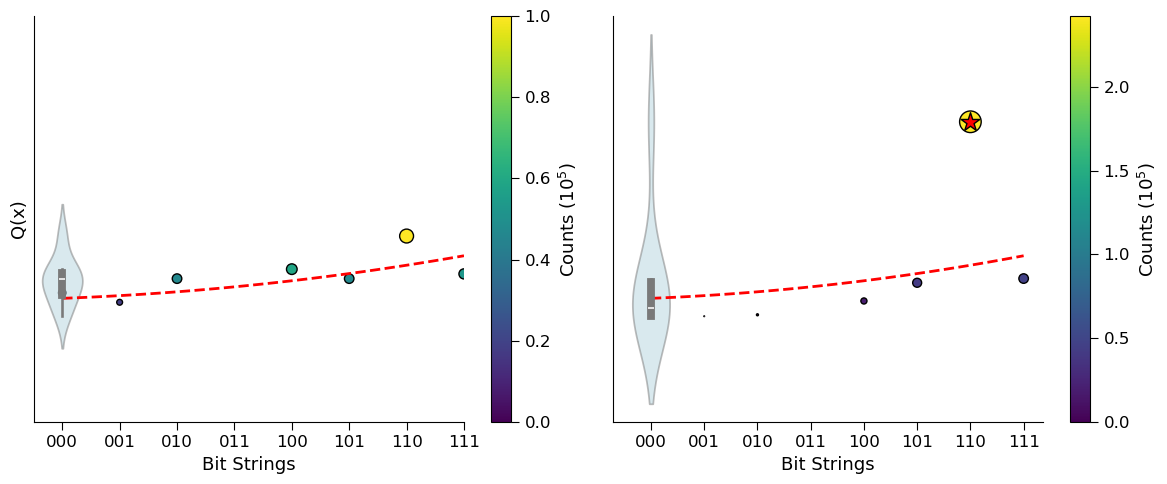

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from matplotlib.ticker import FuncFormatter

# Define the combinations and Q(x) values
combinations = ['000', '001', '010', '011', '100', '101', '110', '111']
Q_values = np.array([0, -2, 3, -5, 5, 3, 12, 4])

# Scale Q(x) values to counts (0 to 100,000)
min_Q = np.min(Q_values)
max_Q = np.max(Q_values)
scaled_counts = (Q_values - min_Q) / (max_Q - min_Q) * 100000

# Define x-axis positions for combinations
x_positions = np.arange(len(combinations))

# Define a function to model the Bayesian optimization prediction
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the quadratic model to the data
params, _ = curve_fit(quadratic_model, x_positions, scaled_counts)

# Generate smooth x values for plotting the fit
x_fit = np.linspace(0, len(combinations)-1, 100)
y_fit = quadratic_model(x_fit, *params)

# Function to apply Bayesian-inspired transformation
def bayesian_rescale(Q_values, optimized_index, alpha=1.0):
    distances = np.abs(np.arange(len(Q_values)) - optimized_index)
    weights = np.exp(-alpha * distances)  # Apply exponential decay
    rescaled_counts = weights * Q_values  # Scale original counts
    rescaled_counts *= np.sum(Q_values) / np.sum(rescaled_counts)  # Normalize total sum
    return rescaled_counts

# Compute new optimized counts
optimized_index = combinations.index('110')
new_scaled_counts = bayesian_rescale(scaled_counts, optimized_index, alpha=1.0)
new_scaled_counts = np.maximum(new_scaled_counts, 0)  # Ensure no negative values

# Plot before and after Bayesian optimization adjustment
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Before Optimization ---
scatter_before = axes[0].scatter(x_positions, scaled_counts, c=scaled_counts, cmap='viridis', 
                                 s=scaled_counts / 1000, edgecolor='black')
axes[0].plot(x_fit, quadratic_model(x_fit, *params), color='red', linestyle='dashed', linewidth=2)
sns.violinplot(y=scaled_counts, inner="box", color="lightblue", alpha=0.5, width=0.7, ax=axes[0])
axes[0].set_xticks(range(len(combinations)))
axes[0].set_xticklabels(combinations)
# axes[0].set_title("Before Optimization")
axes[0].set_xlabel("Bit Strings")
axes[0].set_ylabel("Q(x)")  # Label representing QUBO
axes[0].tick_params(left=False)  # Remove y ticks

# Add colorbar to the side for the first plot with 10^5 formatting
cbar_before = fig.colorbar(scatter_before, ax=axes[0], format=FuncFormatter(lambda x, _: f'{x / 1e5:.1f}'))
cbar_before.set_label(r'Counts ($10^5$)')

# --- After Optimization ---
scatter_after = axes[1].scatter(x_positions, new_scaled_counts, c=new_scaled_counts, cmap='viridis', 
                                s=new_scaled_counts / 1000, edgecolor='black')
axes[1].plot(x_fit, quadratic_model(x_fit, *params), color='red', linestyle='dashed', linewidth=2)
sns.violinplot(y=new_scaled_counts, inner="box", color="lightblue", alpha=0.5, width=0.7, ax=axes[1])
axes[1].scatter(x_positions[optimized_index], new_scaled_counts[optimized_index], 
                color='red', edgecolors='black', s=200, marker='*')
axes[1].set_xticks(range(len(combinations)))
axes[1].set_xticklabels(combinations)
# axes[1].set_title("After Optimization")
axes[1].set_xlabel("Bit Strings")
axes[1].tick_params(left=False)  # Remove y ticks

# Add colorbar to the side for the second plot with 10^5 formatting
cbar_after = fig.colorbar(scatter_after, ax=axes[1], format=FuncFormatter(lambda x, _: f'{x / 1e5:.1f}'))
cbar_after.set_label(r'Counts ($10^5$)')
plt.yticks([])
plt.tight_layout()
plt.show()


In [ ]:
#some regular python libraries
import networkx as nx
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

#import problem classes from OQ for easy problem creation
from openqaoa.problems import MaximumCut, NumberPartition

#import the QAOA workflow model
from openqaoa import QAOA
from qaoa_components.variational_parameters.variational_baseparams import QAOAVariationalBaseParams
#import method to specify the device
from openqaoa.backends import create_device

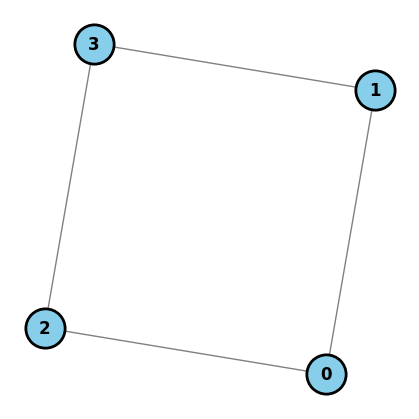

In [ ]:
# Re-import necessary libraries due to execution state reset
import networkx as nx
import matplotlib.pyplot as plt

# Define graph parameters
nodes = 4
edge_probability = 0.6

# Generate random graph
g = nx.generators.fast_gnp_random_graph(n=nodes, p=edge_probability, seed=44)

# Improve graph aesthetics
plt.figure(figsize=(4, 4))  # Set figure size
pos = nx.spring_layout(g, seed=42)  # Use spring layout for better spacing
nx.draw(
    g, pos, with_labels=True, node_color="skyblue", edge_color="gray", 
    node_size=800, font_size=12, font_weight="bold", linewidths=2, edgecolors="black", 
)

# Display the improved graph
# plt.title("Improved Random Graph Visualization")
plt.show()


/tmp/ipykernel_902517/175192480.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter([-0.1], [-0.1], [0.1], color="red", s=100, edgecolor="black", marker="x")  # Red 'X' point


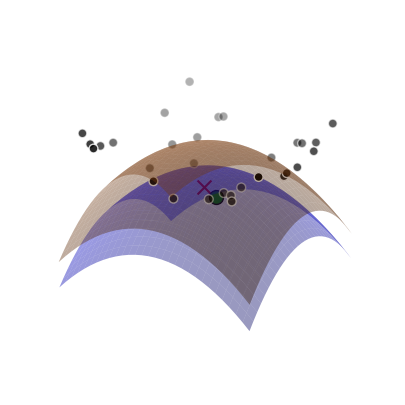

In [29]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D plot without ticks labels and grid
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of raw data points
ax.scatter(X, Y, Z, color="black", edgecolor="white", s=40)

# Plot decision surfaces
ax.plot_surface(X_grid, Y_grid, Z_blue, color="blue", alpha=0.4)
ax.plot_surface(X_grid, Y_grid, Z_brown, color="saddlebrown", alpha=0.4)

# Highlight specific points
ax.scatter([0.2], [0.2], [0.2], color="green", s=100, edgecolor="black")  # Green point
ax.scatter([-0.1], [-0.1], [0.1], color="red", s=100, edgecolor="black", marker="x")  # Red 'X' point

# Remove axis labels, ticks, and grid
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.grid(False)
ax.axis("off")

# Adjust view angle
ax.view_init(elev=20, azim=30)

plt.show()



NameError: name 'X' is not defined

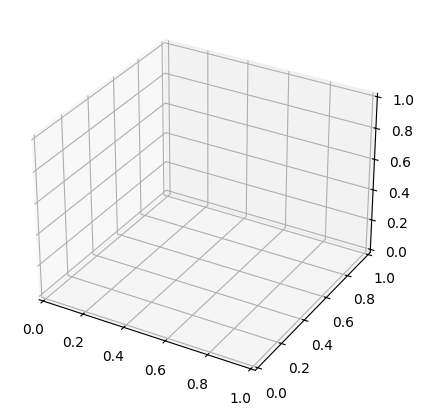

In [2]:
# transparent
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure and 3D plot without ticks labels and grid
fig = plt.figure(figsize=(6, 5))
fig.patch.set_alpha(0)  # Make the figure background transparent
ax = fig.add_subplot(111, projection='3d')
ax.patch.set_alpha(0)  # Make the 3D axes background transparent

# Scatter plot of raw data points
ax.scatter(X, Y, Z, color="black", edgecolor="white", s=40)

# Plot decision surfaces
ax.plot_surface(X_grid, Y_grid, Z_blue, color="blue", alpha=0.4)
ax.plot_surface(X_grid, Y_grid, Z_brown, color="saddlebrown", alpha=0.4)

# Highlight specific points
ax.scatter([0.2], [0.2], [0.2], color="green", s=100, edgecolor="black")  # Green point
ax.scatter([-0.1], [-0.1], [0.1], color="red", s=100, edgecolor="black", marker="x")  # Red 'X' point

# Remove axis labels, ticks, and grid
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.grid(False)
ax.axis("off")

# Adjust view angle
ax.view_init(elev=20, azim=30)

# Save with transparency
plt.savefig("transparent_plot.png", transparent=True, dpi=300)
plt.show()


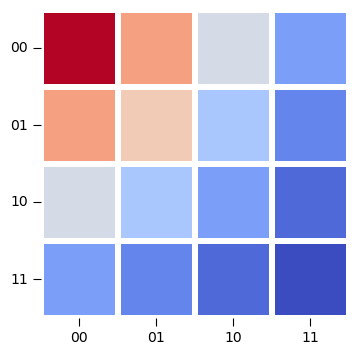

In [18]:
# Generate a 4x4 matrix with values decreasing from top-left to bottom-right
heatmap_data = np.array([[16, 12, 8, 4],
                         [12, 10, 6, 3],
                         [8, 6, 4, 2],
                         [4, 3, 2, 1]])

# Define custom tick labels for x and y axes
tick_labels = ["00", "01", "10", "11"]

# Create a heatmap with increased gaps and ordered data
plt.figure(figsize=(4, 4))
sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", cbar=False, square=True,
            linewidths=3, linecolor="white", xticklabels=tick_labels, yticklabels=tick_labels)

# Set tick label sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)  # Keep y-axis labels horizontal

plt.show()


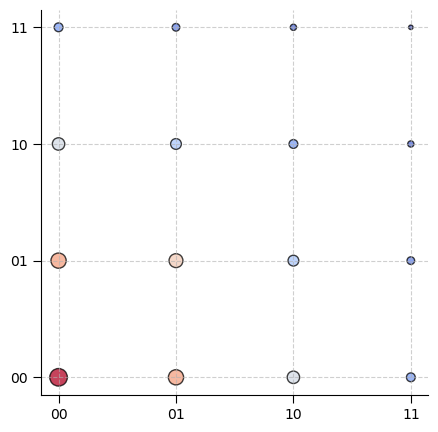

In [22]:
# Extracting data for scatter plot
x_vals = []
y_vals = []
sizes = []

# Convert matrix data to scatter plot points
for i in range(4):
    for j in range(4):
        x_vals.append(i)
        y_vals.append(j)
        sizes.append(heatmap_data[i, j] * 10)  # Scale size based on value

# Create scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(x_vals, y_vals, s=sizes, c=heatmap_data.flatten(), cmap="coolwarm", edgecolors="black", alpha=0.75)

# Set tick labels
plt.xticks(range(4), ["00", "01", "10", "11"], fontsize=10)
plt.yticks(range(4), ["00", "01", "10", "11"], fontsize=10)

# Labels and formatting
# plt.xlabel("X-axis", fontsize=12)
# plt.ylabel("Y-axis", fontsize=12)
# plt.title("Scatter Plot of Heatmap Data", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


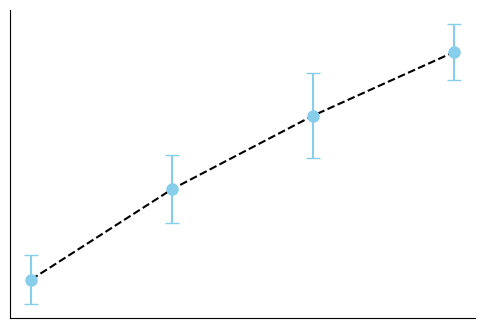

In [29]:
# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Generate more data points
x = np.linspace(1, 3, 4)  # More points between 1 and 3
y = -4 + 2 * np.sqrt(x)  # Example curved relationship
y_err = np.random.uniform(0.1, 0.3, size=len(x))  # Randomized noise deviation

# Plot the curved data with noise deviation
plt.figure(figsize=(6, 4))
plt.errorbar(x, y, yerr=y_err, fmt='o', color='Skyblue', capsize=5, markersize=8, label="Data with noise")
plt.plot(x, y, 'k--', label="Trendline")

# Labels and formatting
# plt.xlabel("Noise scale factor")
# plt.ylabel("Expectation value")
plt.grid(False)
# plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()


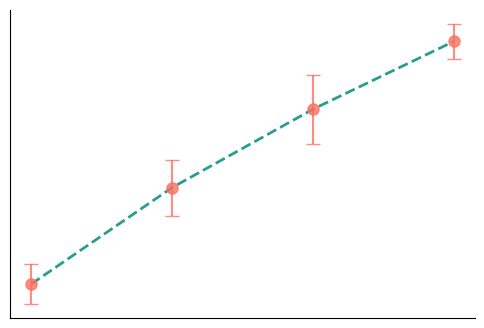

In [30]:
# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Generate more data points
x = np.linspace(1, 3, 4)  # More points between 1 and 3
y = -4 + 2 * np.sqrt(x)  # Example curved relationship
y_err = np.random.uniform(0.1, 0.3, size=len(x))  # Randomized noise deviation

# Define an aesthetically pleasing color palette
plt.figure(figsize=(6, 4))

# Plot data points with error bars
plt.errorbar(x, y, yerr=y_err, fmt='o', color='#FF6F61', capsize=5, markersize=8, label="Data with noise", alpha=0.8)

# Plot the trendline with a more elegant color
plt.plot(x, y, linestyle='--', color='#2A9D8F', linewidth=2, label="Trendline")

# Formatting for aesthetics
plt.grid(False)  # No grid for a cleaner look
plt.xticks([])  # No tick labels
plt.yticks([])
plt.show()


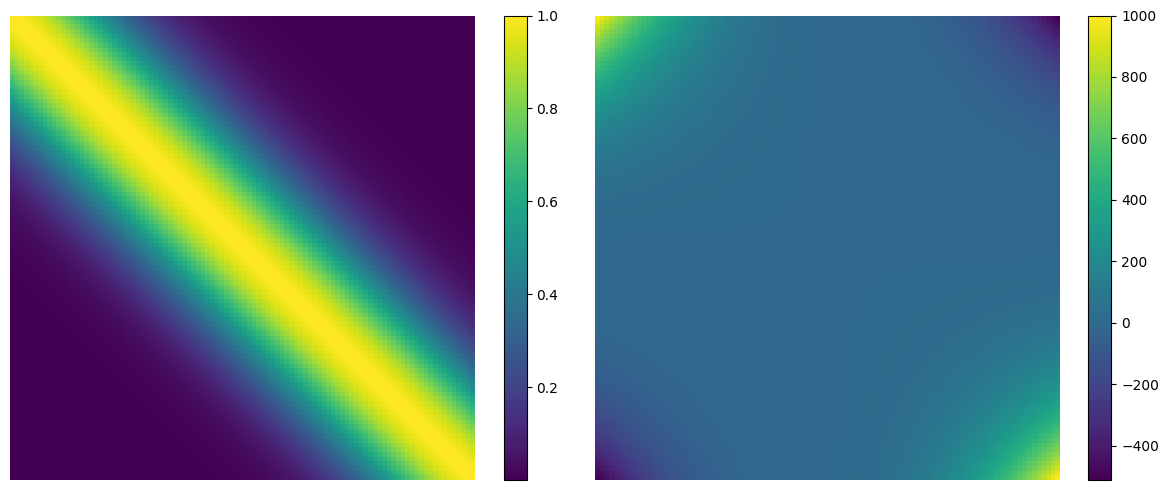

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian Process Kernel (RBF Kernel)
def rbf_kernel(x1, x2, length_scale=1.0, variance=1.0):
    return variance * np.exp(-0.5 * np.subtract.outer(x1, x2) ** 2 / length_scale**2)

# Define the Polynomial Kernel
def polynomial_kernel(x1, x2, degree=3, coef=1.0, bias=1.0):
    return (coef * np.outer(x1, x2) + bias) ** degree

# Generate input data
x = np.linspace(-3, 3, 100)

# Compute kernel matrices
rbf_matrix = rbf_kernel(x, x)
poly_matrix = polynomial_kernel(x, x)

# Re-plot the kernels without grids, labels, or titles

plt.figure(figsize=(12, 5))

# Gaussian Process Kernel (RBF)
plt.subplot(1, 2, 1)
plt.imshow(rbf_matrix, cmap='viridis', extent=[-3, 3, -3, 3])
plt.axis('off')  # Remove axes
plt.colorbar()

# Polynomial Kernel
plt.subplot(1, 2, 2)
plt.imshow(poly_matrix, cmap='viridis', extent=[-3, 3, -3, 3])
plt.axis('off')  # Remove axes
plt.colorbar()

plt.tight_layout()
plt.show()


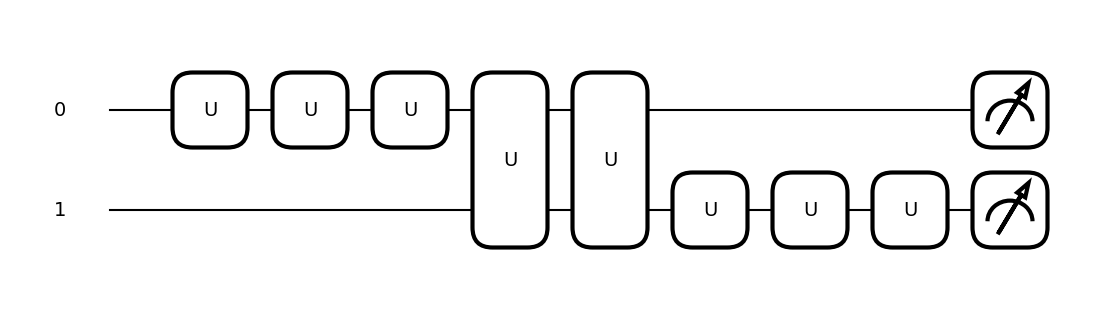

In [11]:
import pennylane as qml
import matplotlib.pyplot as plt

@qml.qnode(dev)
def circuit():
    qml.QubitUnitary(qml.numpy.eye(2), wires=0)
    qml.QubitUnitary(qml.numpy.eye(2), wires=0)
    qml.QubitUnitary(qml.numpy.eye(2), wires=0)
    qml.QubitUnitary(qml.numpy.eye(4), wires=[0, 1])
    qml.QubitUnitary(qml.numpy.eye(4), wires=[0, 1])
    qml.QubitUnitary(qml.numpy.eye(2), wires=1)
    qml.QubitUnitary(qml.numpy.eye(2), wires=1)
    qml.QubitUnitary(qml.numpy.eye(2), wires=1)
    return qml.probs(wires=[0, 1])

qml.drawer.use_style('black_white')
fig, ax = qml.draw_mpl(circuit)()

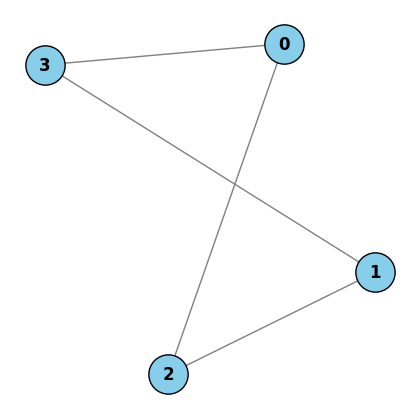

In [10]:
# Re-import necessary libraries due to execution state reset
import networkx as nx
import matplotlib.pyplot as plt

# Define graph parameters
nodes = 4
edge_probability = 0.6

# Generate random graph
g = nx.generators.fast_gnp_random_graph(n=nodes, p=edge_probability, seed=42)

# Improve graph aesthetics
plt.figure(figsize=(4, 4))  # Set figure size
pos = nx.spring_layout(g, seed=42)  # Use spring layout for better spacing
nx.draw(
    g, pos, with_labels=True, node_color="skyblue", edge_color="gray", 
    node_size=800, font_size=12, font_weight="bold", linewidths=1, edgecolors="black"
)

# Display the improved graph
# plt.title("Improved Random Graph Visualization")
plt.show()


In [23]:
from openqaoa.problems import MaximumCut, NumberPartition
# Use the MaximumCut class to instantiate the problem.
maxcut_prob = MaximumCut(g)

# The property `qubo` translates the problem into a binary Qubo problem.
# The binary values can be access via the `asdict()` method.
#import problem classes from OQ for easy problem creation
maxcut_qubo = maxcut_prob.qubo

/global/homes/g/gzquse/.local/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


In [19]:
maxcut_qubo

In [20]:
maxcut_qubo.hamiltonian

In [24]:
print(maxcut_qubo)

In [29]:
from openqaoa.problems import QUBO

# Define knapsack parameters
values = [4, 2, 3]       # Item values
weights = [3, 2, 2]      # Item weights
capacity = 4             # Knapsack capacity
penalty = 5              # Penalty factor (tunable)

num_vars = len(values)  # Number of items (binary variables)

# Construct QUBO terms and weights
qubo_terms = []  # List of (i, j) index pairs
qubo_weights = []  # List of corresponding coefficients

# Objective: Maximize total value
for i in range(num_vars):
    qubo_terms.append((i, i))  # Linear terms for individual items
    qubo_weights.append(-values[i])  # Negative value for maximization

# Constraint: Penalize exceeding weight
for i in range(num_vars):
    for j in range(num_vars):
        qubo_terms.append((i, j))
        qubo_weights.append(penalty * weights[i] * weights[j])

# Adjust linear terms for the capacity constraint
for i in range(num_vars):
    qubo_terms.append((i, i))
    qubo_weights.append(-2 * penalty * capacity * weights[i])

# Create QUBO instance (without a constant term)
qubo_problem = QUBO(n=num_vars, terms=qubo_terms, weights=qubo_weights)

# Print QUBO formulation
print("QUBO formulation for Knapsack:")
for (term, weight) in zip(qubo_problem.terms, qubo_problem.weights):
    if len(term) == 1:  # Linear term (single variable)
        print(f"{weight} * x_{term[0]}")
    else:  # Quadratic term (interaction between two variables)
        print(f"{weight} * x_{term[0]} * x_{term[1]}")


QUBO formulation for Knapsack:
-79.0 * x_0
-62.0 * x_1
-63.0 * x_2
60.0 * x_0 * x_1
60.0 * x_0 * x_2
40.0 * x_1 * x_2
